In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
file_path = '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [2]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#information about data before cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
df.drop('customerID', axis = 1, inplace = True)

In [5]:
#https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
#convert empty cells to 'NaN'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
#https://www.geeksforgeeks.org/data-analysis/working-with-missing-data-in-pandas/
#drop rows without a recorded payment
df.dropna(axis=0, how='any', inplace = True)

In [6]:
display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#post cleaning data info - shows that customerID column has been removed and rows without a payment have been deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

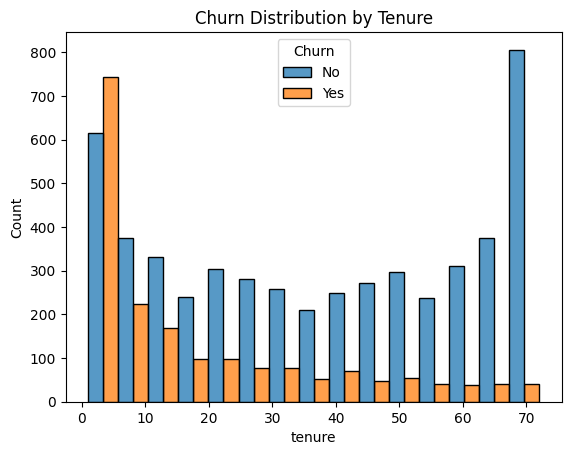

In [8]:
#https://seaborn.pydata.org/tutorial/distributions.html
sns.histplot(data = df, x = 'tenure', hue = 'Churn', multiple = 'dodge')
plt.title('Churn Distribution by Tenure')
plt.show()

In [9]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
churn_agg = df.groupby(['Contract', 'Churn']).size()
print(churn_agg)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
plottable_churn_agg = churn_agg.unstack(fill_value = 0)
print(plottable_churn_agg)

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
dtype: int64
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48


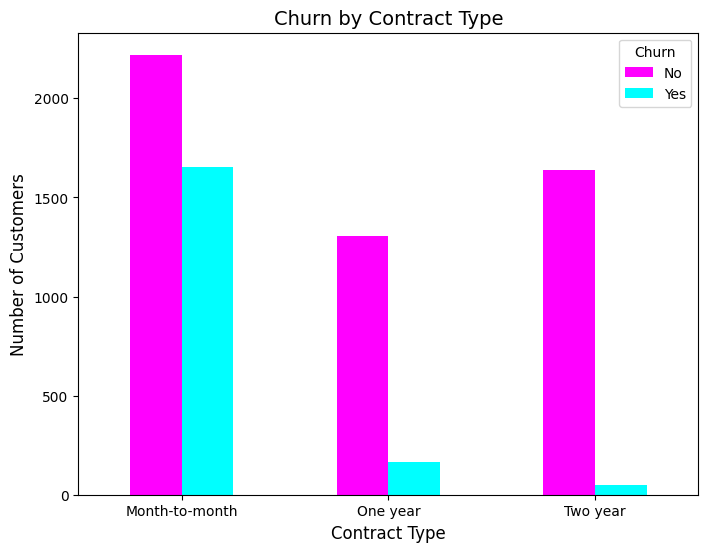

In [10]:
#https://www.datacamp.com/tutorial/python-bar-plot
plottable_churn_agg.plot.bar(figsize = (8, 6), color=['magenta', 'aqua'])
plt.title('Churn by Contract Type', fontsize = 14)
plt.xlabel('Contract Type', fontsize = 12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation = 0)
plt.show()

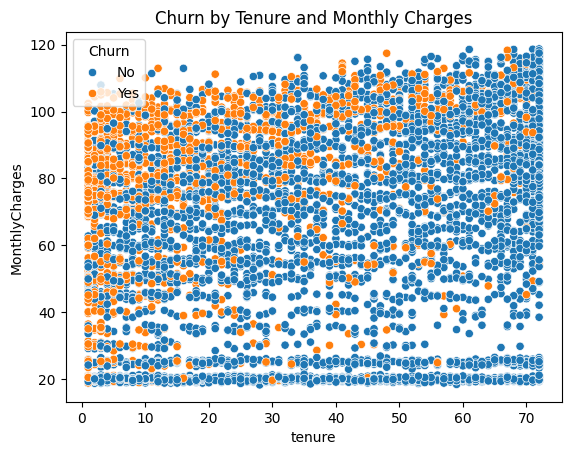

In [11]:
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data = df, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn')
plt.title('Churn by Tenure and Monthly Charges')
plt.show()

In [12]:
#https://www.geeksforgeeks.org/python/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#use everything column excluding churn for making predictions 
X = df.drop('Churn', axis = 1)
#https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
X = pd.get_dummies(X, drop_first = True)

#will predict the Churn column
y = df['Churn']
#https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
y = y.map({'Yes': 1, 'No': 0})

#80:20 training:test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.53      0.57       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [16]:
print("Accuracy Score")
print(accuracy_score(y_test,y_pred))

Accuracy Score
0.7960199004975125


In [17]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[926 115]
 [172 194]]


In [45]:

def contract_response(prediction):
    return "is" if prediction else "is not"

contract_type = input("Enter contract type (Month-to-month, One year, Two year): ")
query_row = pd.DataFrame({"Contract": [contract_type]})
query_encoded = pd.get_dummies(query_row)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html
query_encoded = query_encoded.reindex(columns=X_train.columns, fill_value=0)
churn_prediction = model.predict(query_encoded)
prediction_text = contract_response(churn_prediction)

print(f"If the customer has a {contract_type} contract, Churn {prediction_text} Expected")

Enter contract type (Month-to-month, One year, Two year):  One year


If the customer has a One year contract, Churn is not Expected
